In [4]:
!apt-get install default-jre
!java-version
!pip install h2o


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  default-jre-headless fonts-dejavu-core fonts-dejavu-extra libatk-wrapper-java
  libatk-wrapper-java-jni libfontenc1 libxkbfile1 libxtst6 libxxf86dga1 openjdk-11-jre x11-utils
Suggested packages:
  mesa-utils
The following NEW packages will be installed:
  default-jre default-jre-headless fonts-dejavu-core fonts-dejavu-extra libatk-wrapper-java
  libatk-wrapper-java-jni libfontenc1 libxkbfile1 libxtst6 libxxf86dga1 openjdk-11-jre x11-utils
0 upgraded, 12 newly installed, 0 to remove and 49 not upgraded.
Need to get 3,720 kB of archives.
After this operation, 12.7 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/main amd64 default-jre-headless amd64 2:1.11-72build2 [3,042 B]
Get:2 http://archive.ubuntu.com/ubuntu jammy/main amd64 libxtst6 amd64 2:1.2.3-1build4 [13.4 kB]
Get:3 http://archive.ubuntu.com

In [5]:
import h2o

In [6]:
h2o.init()
from h2o.automl import H2OAutoML

Checking whether there is an H2O instance running at http://localhost:54321..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "11.0.24" 2024-07-16; OpenJDK Runtime Environment (build 11.0.24+8-post-Ubuntu-1ubuntu322.04); OpenJDK 64-Bit Server VM (build 11.0.24+8-post-Ubuntu-1ubuntu322.04, mixed mode, sharing)
  Starting server from /usr/local/lib/python3.10/dist-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmp3038bmyf
  JVM stdout: /tmp/tmp3038bmyf/h2o_unknownUser_started_from_python.out
  JVM stderr: /tmp/tmp3038bmyf/h2o_unknownUser_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O_cluster_uptime:,06 secs
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.46.0.5
H2O_cluster_version_age:,1 month and 22 days
H2O_cluster_name:,H2O_from_python_unknownUser_1kl0k8
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.170 Gb
H2O_cluster_total_cores:,2
H2O_cluster_allowed_cores:,2
H2O_cluster_status:,"locked, healthy"


In [34]:
churn_df = h2o.import_file('https://github.com/JIGEESHA-ANAGANI/AUTOML/blob/main/customerchurn.csv')


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [8]:
churn_df.types


{'customerID': 'string',
 'gender': 'enum',
 'SeniorCitizen': 'int',
 'Partner': 'enum',
 'Dependents': 'enum',
 'tenure': 'int',
 'PhoneService': 'enum',
 'MultipleLines': 'enum',
 'InternetService': 'enum',
 'OnlineSecurity': 'enum',
 'OnlineBackup': 'enum',
 'DeviceProtection': 'enum',
 'TechSupport': 'enum',
 'StreamingTV': 'enum',
 'StreamingMovies': 'enum',
 'Contract': 'enum',
 'PaperlessBilling': 'enum',
 'PaymentMethod': 'enum',
 'MonthlyCharges': 'real',
 'TotalCharges': 'real',
 'Churn': 'enum'}

In [9]:
churn_df.describe()


Rows:7043
Cols:21

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
type,string,enum,int,enum,enum,int,enum,enum,enum,enum,enum,enum,enum,enum,enum,enum,enum,enum,real,real,enum
mins,NaN,,0.0,,,0.0,,,,,,,,,,,,,18.25,18.8,
mean,NaN,,0.1621468124378816,,,32.37114865824223,,,,,,,,,,,,,64.76169246059916,2283.300440841865,
maxs,NaN,,1.0,,,72.0,,,,,,,,,,,,,118.75,8684.8,
sigma,NaN,,0.3686116056100131,,,24.559481023094456,,,,,,,,,,,,,30.090047097678482,2266.771361883145,
zeros,0,,5901,,,11,,,,,,,,,,,,,0,0,
missing,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,11,0
0,7590-VHVEG,Female,0.0,Yes,No,1.0,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0.0,No,No,34.0,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0.0,No,No,2.0,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes


In [10]:
churn_train,churn_test,churn_valid = churn_df.split_frame(ratios=[.7, .15])
churn_train

customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.3,1840.75,No
9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.7,151.65,Yes
9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes
7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.8,3046.05,Yes
7469-LKBCI,Male,0,No,No,16,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),18.95,326.8,No
8091-TTVAX,Male,0,Yes,No,58,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,One year,No,Credit card (automatic),100.35,5681.1,No
0280-XJGEX,Male,0,No,No,49,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),103.7,5036.3,Yes


In [11]:
y = "Churn"
x = churn_df.columns
x.remove(y)
x.remove("customerID")

In [12]:
aml = H2OAutoML(max_models = 10, seed = 10, exclude_algos = ["StackedEnsemble", "DeepLearning"], verbosity="info", nfolds=0)


In [13]:
aml.train(x = x, y = y, training_frame = churn_train, validation_frame=churn_valid)


AutoML progress: |
15:51:13.923: Project: AutoML_1_20241021_155113
15:51:13.925: Cross-validation disabled by user: no fold column nor nfolds > 1.
15:51:13.925: Setting stopping tolerance adaptively based on the training frame: 0.01426680147272547
15:51:13.926: Build control seed: 10
15:51:13.927: training frame: Frame key: AutoML_1_20241021_155113_training_py_2_sid_ac2d    cols: 21    rows: 4913  chunks: 8    size: 265730  checksum: -4090716253859864831
15:51:13.927: validation frame: Frame key: py_4_sid_ac2d    cols: 21    rows: 1091  chunks: 8    size: 140073  checksum: 9040187302930687924
15:51:13.927: leaderboard frame: Frame key: py_4_sid_ac2d    cols: 21    rows: 1091  chunks: 8    size: 140073  checksum: 9040187302930687924
15:51:13.927: blending frame: NULL
15:51:13.928: response column: Churn
15:51:13.928: fold column: null
15:51:13.928: weights column: null
15:51:13.981: Loading execution steps: [{XGBoost : [def_2 (1g, 10w), def_1 (2g, 10w), def_3 (3g, 10w), grid_1 (4g, 90w)

Model Details
=============
H2OGeneralizedLinearEstimator : Generalized Linear Modeling
Model Key: GLM_1_AutoML_1_20241021_155113


GLM Model: summary
    family    link    regularization               lambda_search                                                                number_of_predictors_total    number_of_active_predictors    number_of_iterations    training_frame
--  --------  ------  ---------------------------  ---------------------------------------------------------------------------  ----------------------------  -----------------------------  ----------------------  -----------------------------------------------
    binomial  logit   Ridge ( lambda = 4.178E-5 )  nlambda = 30, lambda.max = 16.113, lambda.min = 4.178E-5, lambda.1se = -1.0  45                            45                             49                      AutoML_1_20241021_155113_training_py_2_sid_ac2d

ModelMetricsBinomialGLM: glm
** Reported on train data. **

MSE: 0.1337205210791074
RMSE: 0.3656781659863047
LogLoss: 0.4122222027470208
AUC: 0.8523526348594195
AUCPR: 0.6750977164175357
Gini: 0.704705269718839
Null degrees of freedom: 4912
Residual degrees of freedom: 4867
Null deviance: 5732.07584529948
Residual deviance: 4050.495364192227
AIC: 4142.4953641922275

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.330572103274543
       No    Yes    Error    Rate
-----  ----  -----  -------  ---------------
No     2819  767    0.2139   (767.0/3586.0)
Yes    321   1006   0.2419   (321.0/1327.0)
Total  3140  1773   0.2215   (1088.0/4913.0)

Maximum Metrics: Maximum metrics at their respective thresholds
metric                       threshold    value     idx
---------------------------  -----------  --------  -----
max f1                       0.330572     0.649032  215
max f2                       0.173914     0.758441  289
max f0point5                 0.539219     0.644799  125
max accuracy                 0.539219     0.806025  125
max precision                0.862033     1         0
max recall                   0.00353479   1         397
max specificity              0.862033     1         0
max absolute_mcc             0.330572     0.503142  215
max min_per_class_accuracy   0.3131       0.770912  223
max mean_per_class_accuracy  0.26883      0.774752  243
max tns                      0.862033     3586      0
max fns                      0.862033     1325      0
max fps                      0.00183102   3586      399
max tps                      0.00353479   1327      397
max tnr                      0.862033     1         0
max fnr                      0.862033     0.998493  0
max fpr                      0.00183102   1         399
max tpr                      0.00353479   1         397

Gains/Lift Table: Avg response rate: 27.01 %, avg score: 27.01 %
group    cumulative_data_fraction    lower_threshold    lift       cumulative_lift    response_rate    score       cumulative_response_rate    cumulative_score    capture_rate    cumulative_capture_rate    gain      cumulative_gain    kolmogorov_smirnov
-------  --------------------------  -----------------  ---------  -----------------  ---------------  ----------  --------------------------  ------------------  --------------  -------------------------  --------  -----------------  --------------------
1        0.0101771                   0.802127           3.55424    3.55424            0.96             0.823479    0.96                        0.823479            0.0361718       0.0361718                  255.424   255.424            0.0356141
2        0.0201506                   0.775344           3.02232    3.29097            0.816327         0.788563    0.888889                    0.806197            0.0301432       0.066315                   202.232   229.097            0.0632475
3        0.0301242                   0.756676           3.09787    3.22704            0.836735         0.765498    0.871622                    0.792722            0.0308968       0.0972118                 

In [14]:
lb = aml.leaderboard

In [15]:
lb.head()

model_id,auc,logloss,aucpr,mean_per_class_error,rmse,mse
GLM_1_AutoML_1_20241021_155113,0.843209,0.410635,0.610173,0.222849,0.363632,0.132228
GBM_1_AutoML_1_20241021_155113,0.839193,0.41185,0.632598,0.240752,0.364802,0.13308
XGBoost_1_AutoML_1_20241021_155113,0.836916,0.42042,0.630661,0.232137,0.368412,0.135728
GBM_2_AutoML_1_20241021_155113,0.835886,0.416839,0.630203,0.241205,0.367981,0.13541
XRT_1_AutoML_1_20241021_155113,0.83585,0.418862,0.621786,0.235654,0.367972,0.135403
XGBoost_3_AutoML_1_20241021_155113,0.835492,0.419547,0.628423,0.239391,0.367612,0.135139
GBM_3_AutoML_1_20241021_155113,0.825846,0.429279,0.617439,0.249899,0.373103,0.139206
GBM_4_AutoML_1_20241021_155113,0.823002,0.434184,0.604727,0.25997,0.37582,0.141241
XGBoost_2_AutoML_1_20241021_155113,0.817802,0.447953,0.598702,0.262173,0.382072,0.145979
DRF_1_AutoML_1_20241021_155113,0.813358,0.521759,0.602974,0.25135,0.37773,0.14268


In [16]:
churn_pred=aml.leader.predict(churn_test)

glm prediction progress: |███████████████████████████████████████████████████████| (done) 100%


In [17]:
churn_pred.head()


predict,No,Yes
Yes,0.497017,0.502983
No,0.703415,0.296585
No,0.987247,0.0127527
No,0.77167,0.22833
Yes,0.248707,0.751293
Yes,0.275598,0.724402
Yes,0.285433,0.714567
No,0.988645,0.0113551
Yes,0.384404,0.615596
No,0.773046,0.226954


In [18]:
aml.leader.model_performance(churn_test)

ModelMetricsBinomialGLM: glm
** Reported on test data. **

MSE: 0.14001253789576565
RMSE: 0.37418249277025994
LogLoss: 0.4292148213162822
AUC: 0.828319591789668
AUCPR: 0.6377674694490599
Gini: 0.6566391835793359
Null degrees of freedom: 1038
Residual degrees of freedom: 993
Null deviance: 1193.064059440836
Residual deviance: 891.9083986952344
AIC: 983.9083986952344

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.4018469673123226
       No    Yes    Error    Rate
-----  ----  -----  -------  --------------
No     647   121    0.1576   (121.0/768.0)
Yes    105   166    0.3875   (105.0/271.0)
Total  752   287    0.2175   (226.0/1039.0)

Maximum Metrics: Maximum metrics at their respective thresholds
metric                       threshold    value     idx
---------------------------  -----------  --------  -----
max f1                       0.401847     0.594982  153
max f2                       0.152627     0.733253  282
max f0point5                 0.528546     0.650651  101
max accuracy                 0.528546     0.814244  101
max precision                0.853878     1         0
max recall                   0.0097355    1         388
max specificity              0.853878     1         0
max absolute_mcc             0.516144     0.477162  106
max min_per_class_accuracy   0.278187     0.734317  212
max mean_per_class_accuracy  0.173857     0.738375  269
max tns                      0.853878     768       0
max fns                      0.853878     270       0
max fps                      0.00148132   768       399
max tps                      0.0097355    271       388
max tnr                      0.853878     1         0
max fnr                      0.853878     0.99631   0
max fpr                      0.00148132   1         399
max tpr                      0.0097355    1         388

Gains/Lift Table: Avg response rate: 26.08 %, avg score: 25.69 %
group    cumulative_data_fraction    lower_threshold    lift       cumulative_lift    response_rate    score       cumulative_response_rate    cumulative_score    capture_rate    cumulative_capture_rate    gain      cumulative_gain    kolmogorov_smirnov
-------  --------------------------  -----------------  ---------  -----------------  ---------------  ----------  --------------------------  ------------------  --------------  -------------------------  --------  -----------------  --------------------
1        0.0105871                   0.787202           3.13687    3.13687            0.818182         0.810742    0.818182                    0.810742            0.0332103       0.0332103                  213.687   213.687            0.0306062
2        0.0202117                   0.760574           2.68376    2.9211             0.7              0.771496    0.761905                    0.792053            0.0258303       0.0590406                  168.376   192.11             0.0525302
3        0.0307988                   0.750643           3.48541    3.11508            0.909091         0.753772    0.8125                      0.778894            0.0369004       0.095941                   248.541   211.508            0.0881285
4        0.0404235                   0.739599           3.45055    3.19496            0.9              0.745084    0.833333                    0.770844            0.0332103       0.129151                   245.055   219.496            0.120037
5        0.0500481                   0.72522            3.06716    3.17038            0.8              0.732876    0.826923                    0.763542            0.0295203       0.158672                   206.716   217.038            0.146953
6        0.100096                    0.637258           2.65427    2.91233            0.692308         0.681681    0.759615                    0.722611            0.132841        0.291513                   165.427   191.233            0.258961
7        0.150144                    0.567258           2.58054    2.80173            0.673077         0.601965    0.730769          

In [19]:
model_ids = list(aml.leaderboard['model_id'].as_data_frame().iloc[:,0])
#se = h2o.get_model([mid for mid in model_ids if "StackedEnsemble_AllModels" in mid][0])
#metalearner = h2o.get_model(se.metalearner()['name'])


/usr/local/lib/python3.10/dist-packages/h2o/frame.py:1981: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install polars and pyarrow and use it as pandas_df = h2o_df.as_data_frame(use_multi_thread=True)

  warnings.warn("Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"


In [20]:

model_ids

['GLM_1_AutoML_1_20241021_155113',
 'GBM_1_AutoML_1_20241021_155113',
 'XGBoost_1_AutoML_1_20241021_155113',
 'GBM_2_AutoML_1_20241021_155113',
 'XRT_1_AutoML_1_20241021_155113',
 'XGBoost_3_AutoML_1_20241021_155113',
 'GBM_3_AutoML_1_20241021_155113',
 'GBM_4_AutoML_1_20241021_155113',
 'XGBoost_2_AutoML_1_20241021_155113',
 'DRF_1_AutoML_1_20241021_155113']

In [21]:
h2o.get_model([mid for mid in model_ids if "XGBoost" in mid][0])


Model Details
=============
H2OXGBoostEstimator : XGBoost
Model Key: XGBoost_1_AutoML_1_20241021_155113


Model Summary: 
    number_of_trees
--  -----------------
    35

ModelMetricsBinomial: xgboost
** Reported on train data. **

MSE: 0.10126395942866609
RMSE: 0.3182199859038808
LogLoss: 0.3244958014058699
Mean Per-Class Error: 0.16390133530253087
AUC: 0.916726943220117
AUCPR: 0.813346097438337
Gini: 0.8334538864402341

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.36400657892227173
       No    Yes    Error    Rate
-----  ----  -----  -------  --------------
No     3105  481    0.1341   (481.0/3586.0)
Yes    257   1070   0.1937   (257.0/1327.0)
Total  3362  1551   0.1502   (738.0/4913.0)

Maximum Metrics: Maximum metrics at their respective thresholds
metric                       threshold    value     idx
---------------------------  -----------  --------  -----
max f1                       0.364007     0.743572  212
max f2                       0.207839     0.815874  273
max f0point5                 0.514399     0.760389  153
max accuracy                 0.496977     0.86037   159
max precision                0.980344     1         0
max recall                   0.0119336    1         390
max specificity              0.980344     1         0
max absolute_mcc             0.421762     0.645428  190
max min_per_class_accuracy   0.318822     0.836587  228
max mean_per_class_accuracy  0.342989     0.838924  220
max tns                      0.980344     3586      0
max fns                      0.980344     1325      0
max fps                      0.00215897   3586      399
max tps                      0.0119336    1327      390
max tnr                      0.980344     1         0
max fnr                      0.980344     0.998493  0
max fpr                      0.00215897   1         399
max tpr                      0.0119336    1         390

Gains/Lift Table: Avg response rate: 27.01 %, avg score: 27.01 %
group    cumulative_data_fraction    lower_threshold    lift      cumulative_lift    response_rate    score       cumulative_response_rate    cumulative_score    capture_rate    cumulative_capture_rate    gain      cumulative_gain    kolmogorov_smirnov
-------  --------------------------  -----------------  --------  -----------------  ---------------  ----------  --------------------------  ------------------  --------------  -------------------------  --------  -----------------  --------------------
1        0.0101771                   0.929272           3.70234   3.70234            1                0.943392    1                           0.943392            0.037679        0.037679                   270.234   270.234            0.037679
2        0.0201506                   0.902026           3.62678   3.66494            0.979592         0.916158    0.989899                    0.929913            0.0361718       0.0738508                  262.678   266.494            0.0735719
3        0.0301242                   0.884392           3.47566   3.60227            0.938776         0.893358    0.972973                    0.91781             0.0346647       0.108515                   247.566   260.227            0.1074
4        0.0400977                   0.864953           3.47566   3.57078            0.938776         0.875593    0.964467                    0.907309            0.0346647       0.14318                    247.566   257.078            0.141228
5        0.0500712                   0.840346           3.32455   3.52173            0.897959         0.854387    0.95122                     0.896768            0.0331575       0.176338                   232.455   252.173            0.172991
6        0.100142                    0.737884           3.19063   3.35618            0.861789         0.785642    0.906504                    0.841205            0.159759        0.336096                   219.063   235.618            0.323269
7        0.15001                     0.646155           2.88631   3.19998           

In [22]:
out = h2o.get_model([mid for mid in model_ids if "XGBoost" in mid][0])


In [23]:
out.params


{'model_id': {'default': None,
  'actual': {'__meta': {'schema_version': 3,
    'schema_name': 'ModelKeyV3',
    'schema_type': 'Key<Model>'},
   'name': 'XGBoost_1_AutoML_1_20241021_155113',
   'type': 'Key<Model>',
   'URL': '/3/Models/XGBoost_1_AutoML_1_20241021_155113'},
  'input': None},
 'training_frame': {'default': None,
  'actual': {'__meta': {'schema_version': 3,
    'schema_name': 'FrameKeyV3',
    'schema_type': 'Key<Frame>'},
   'name': 'AutoML_1_20241021_155113_training_py_2_sid_ac2d',
   'type': 'Key<Frame>',
   'URL': '/3/Frames/AutoML_1_20241021_155113_training_py_2_sid_ac2d'},
  'input': {'__meta': {'schema_version': 3,
    'schema_name': 'FrameKeyV3',
    'schema_type': 'Key<Frame>'},
   'name': 'AutoML_1_20241021_155113_training_py_2_sid_ac2d',
   'type': 'Key<Frame>',
   'URL': '/3/Frames/AutoML_1_20241021_155113_training_py_2_sid_ac2d'}},
 'validation_frame': {'default': None,
  'actual': {'__meta': {'schema_version': 3,
    'schema_name': 'FrameKeyV3',
    'schem

In [24]:
out.convert_H2OXGBoostParams_2_XGBoostParams()


({'silent': True,
  'eta': 0.3,
  'colsample_bylevel': 0.8,
  'objective': 'binary:logistic',
  'min_child_weight': 10.0,
  'nthread': 2,
  'seed': 10,
  'max_depth': 15,
  'colsample_bytree': 0.8,
  'lambda': 1.0,
  'gamma': 0.0,
  'alpha': 0.0,
  'booster': 'gbtree',
  'grow_policy': 'depthwise',
  'nround': 10000,
  'subsample': 0.6,
  'max_delta_step': 0.0,
  'tree_method': 'exact'},
 35)

In [25]:
out

Model Details
=============
H2OXGBoostEstimator : XGBoost
Model Key: XGBoost_1_AutoML_1_20241021_155113


Model Summary: 
    number_of_trees
--  -----------------
    35

ModelMetricsBinomial: xgboost
** Reported on train data. **

MSE: 0.10126395942866609
RMSE: 0.3182199859038808
LogLoss: 0.3244958014058699
Mean Per-Class Error: 0.16390133530253087
AUC: 0.916726943220117
AUCPR: 0.813346097438337
Gini: 0.8334538864402341

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.36400657892227173
       No    Yes    Error    Rate
-----  ----  -----  -------  --------------
No     3105  481    0.1341   (481.0/3586.0)
Yes    257   1070   0.1937   (257.0/1327.0)
Total  3362  1551   0.1502   (738.0/4913.0)

Maximum Metrics: Maximum metrics at their respective thresholds
metric                       threshold    value     idx
---------------------------  -----------  --------  -----
max f1                       0.364007     0.743572  212
max f2                       0.207839     0.815874  273
max f0point5                 0.514399     0.760389  153
max accuracy                 0.496977     0.86037   159
max precision                0.980344     1         0
max recall                   0.0119336    1         390
max specificity              0.980344     1         0
max absolute_mcc             0.421762     0.645428  190
max min_per_class_accuracy   0.318822     0.836587  228
max mean_per_class_accuracy  0.342989     0.838924  220
max tns                      0.980344     3586      0
max fns                      0.980344     1325      0
max fps                      0.00215897   3586      399
max tps                      0.0119336    1327      390
max tnr                      0.980344     1         0
max fnr                      0.980344     0.998493  0
max fpr                      0.00215897   1         399
max tpr                      0.0119336    1         390

Gains/Lift Table: Avg response rate: 27.01 %, avg score: 27.01 %
group    cumulative_data_fraction    lower_threshold    lift      cumulative_lift    response_rate    score       cumulative_response_rate    cumulative_score    capture_rate    cumulative_capture_rate    gain      cumulative_gain    kolmogorov_smirnov
-------  --------------------------  -----------------  --------  -----------------  ---------------  ----------  --------------------------  ------------------  --------------  -------------------------  --------  -----------------  --------------------
1        0.0101771                   0.929272           3.70234   3.70234            1                0.943392    1                           0.943392            0.037679        0.037679                   270.234   270.234            0.037679
2        0.0201506                   0.902026           3.62678   3.66494            0.979592         0.916158    0.989899                    0.929913            0.0361718       0.0738508                  262.678   266.494            0.0735719
3        0.0301242                   0.884392           3.47566   3.60227            0.938776         0.893358    0.972973                    0.91781             0.0346647       0.108515                   247.566   260.227            0.1074
4        0.0400977                   0.864953           3.47566   3.57078            0.938776         0.875593    0.964467                    0.907309            0.0346647       0.14318                    247.566   257.078            0.141228
5        0.0500712                   0.840346           3.32455   3.52173            0.897959         0.854387    0.95122                     0.896768            0.0331575       0.176338                   232.455   252.173            0.172991
6        0.100142                    0.737884           3.19063   3.35618            0.861789         0.785642    0.906504                    0.841205            0.159759        0.336096                   219.063   235.618            0.323269
7        0.15001                     0.646155           2.88631   3.19998           

In [26]:

out_gbm = h2o.get_model([mid for mid in model_ids if "GBM" in mid][0])


In [27]:
out.confusion_matrix()

,No,Yes,Error,Rate
No,3105.0,481.0,0.1341,(481.0/3586.0)
Yes,257.0,1070.0,0.1937,(257.0/1327.0)
Total,3362.0,1551.0,0.1502,(738.0/4913.0)


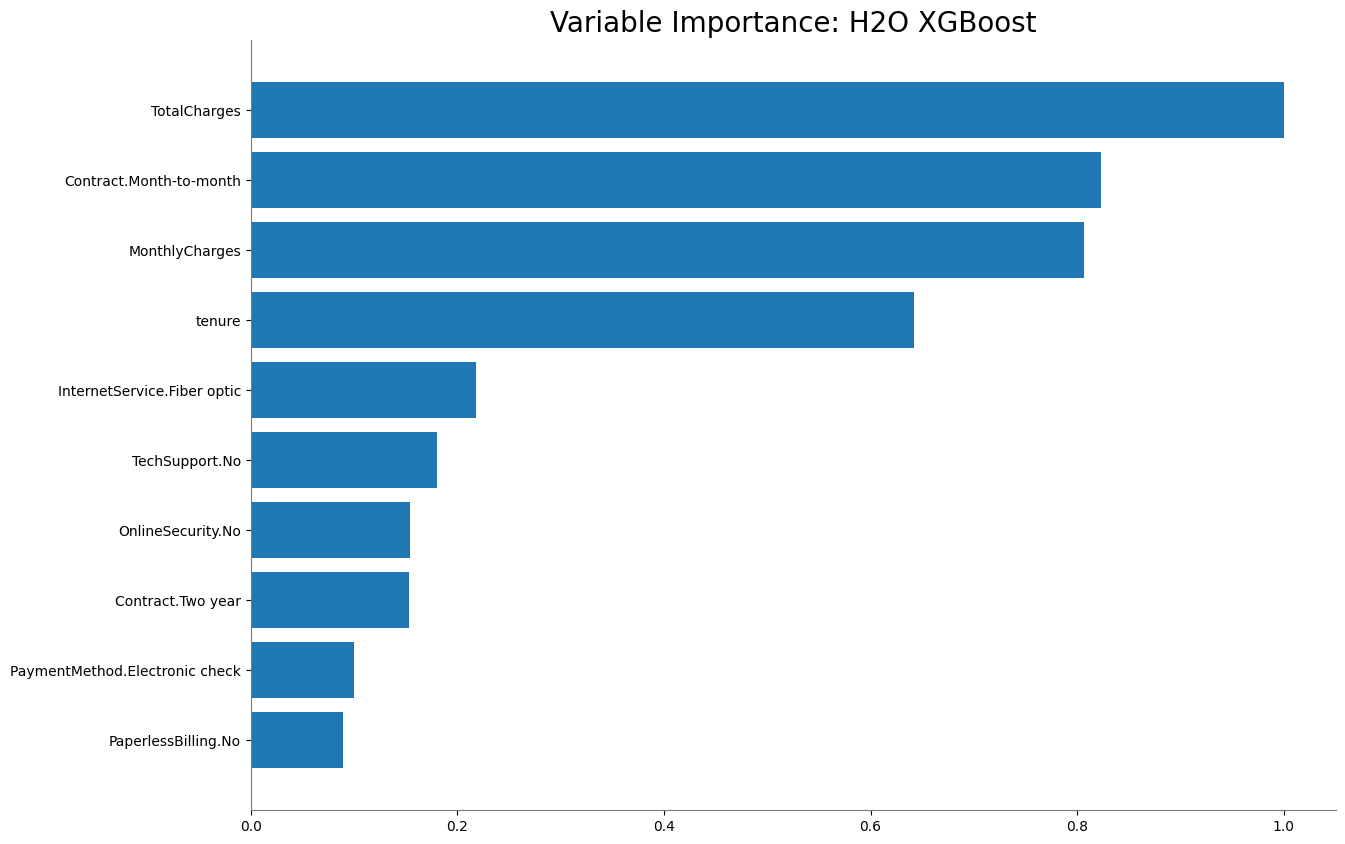

<Figure size 640x480 with 0 Axes>

In [28]:
out.varimp_plot()

In [29]:

aml.leader.download_mojo(path = "./")

'/content/GLM_1_AutoML_1_20241021_155113.zip'

In [30]:
# Predicted values for churn_test
churn_pred = aml.leader.predict(churn_test)

# Display predicted values
print(churn_pred.head())  # Shows the first few rows of predictions

# Model performance metrics on the test set
model_performance = aml.leader.model_performance(churn_test)
print(model_performance)  # Display performance metrics


glm prediction progress: |███████████████████████████████████████████████████████| (done) 100%
predict          No        Yes
Yes        0.497017  0.502983
No         0.703415  0.296585
No         0.987247  0.0127527
No         0.77167   0.22833
Yes        0.248707  0.751293
Yes        0.275598  0.724402
Yes        0.285433  0.714567
No         0.988645  0.0113551
Yes        0.384404  0.615596
No         0.773046  0.226954
[10 rows x 3 columns]

ModelMetricsBinomialGLM: glm
** Reported on test data. **

MSE: 0.14001253789576565
RMSE: 0.37418249277025994
LogLoss: 0.4292148213162822
AUC: 0.828319591789668
AUCPR: 0.6377674694490599
Gini: 0.6566391835793359
Null degrees of freedom: 1038
Residual degrees of freedom: 993
Null deviance: 1193.064059440836
Residual deviance: 891.9083986952344
AIC: 983.9083986952344

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.4018469673123226
       No    Yes    Error    Rate
-----  ----  -----  -------  --------------
No     647   121    0.1576   (1

In [32]:
# For example, to get accuracy, AUC, and logloss
accuracy = model_performance.accuracy()
auc = model_performance.auc()
logloss = model_performance.logloss()

print(f"Accuracy: {accuracy}")
print(f"AUC: {auc}")
print(f"Logloss: {logloss}")


Accuracy: [[0.5285459840012796, 0.8142444658325313]]
AUC: 0.828319591789668
Logloss: 0.4292148213162822


In [33]:
# Extract best model (e.g., XGBoost) parameters
best_model = aml.leader
best_model_params = best_model.params
print(best_model_params)  # Prints model hyperparameters


{'model_id': {'default': None, 'actual': {'__meta': {'schema_version': 3, 'schema_name': 'ModelKeyV3', 'schema_type': 'Key<Model>'}, 'name': 'GLM_1_AutoML_1_20241021_155113', 'type': 'Key<Model>', 'URL': '/3/Models/GLM_1_AutoML_1_20241021_155113'}, 'input': None}, 'training_frame': {'default': None, 'actual': {'__meta': {'schema_version': 3, 'schema_name': 'FrameKeyV3', 'schema_type': 'Key<Frame>'}, 'name': 'AutoML_1_20241021_155113_training_py_2_sid_ac2d', 'type': 'Key<Frame>', 'URL': '/3/Frames/AutoML_1_20241021_155113_training_py_2_sid_ac2d'}, 'input': {'__meta': {'schema_version': 3, 'schema_name': 'FrameKeyV3', 'schema_type': 'Key<Frame>'}, 'name': 'AutoML_1_20241021_155113_training_py_2_sid_ac2d', 'type': 'Key<Frame>', 'URL': '/3/Frames/AutoML_1_20241021_155113_training_py_2_sid_ac2d'}}, 'validation_frame': {'default': None, 'actual': {'__meta': {'schema_version': 3, 'schema_name': 'FrameKeyV3', 'schema_type': 'Key<Frame>'}, 'name': 'py_4_sid_ac2d', 'type': 'Key<Frame>', 'URL': '